In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 食品店收益预测


## 读数据

In [2]:
df = pd.read_csv('ex1/ex1data1.txt', header=None)
df.rename(columns={0: 'Pop', 1: 'Profits'}, inplace=True)
df.head()

,Pop,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


散点图

<AxesSubplot: xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s'>

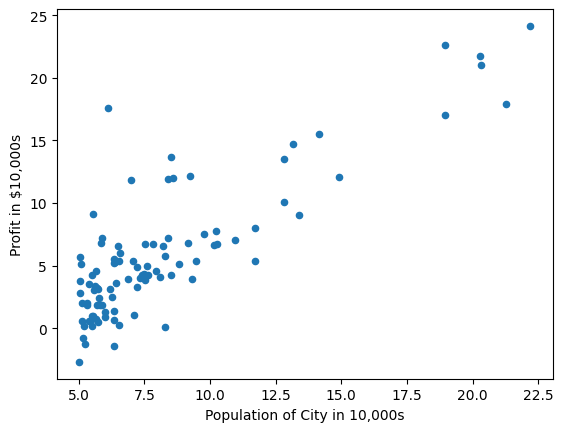

In [3]:
df.plot(kind='scatter', x='Pop', y='Profits', xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s')

In [4]:
x = np.array(df['Pop'])
y = np.array(df['Profits'])
x.shape, y.shape

((97,), (97,))

In [5]:
num_iters = 1500
learning_rate = 0.01
theta = np.zeros((2, 1))

In [6]:
# Add a column of ones to x
x = np.column_stack((np.ones(x.shape[0]), x))
x.shape

(97, 2)

In [7]:
y = y.reshape((97, -1))
y.shape

(97, 1)

## 定义损失函数

In [8]:
def compute_cost(theta, x, y_true):
	return np.sum((np.matmul(x, theta) - y_true) ** 2) / 2 / len(x)

In [9]:
compute_cost(theta, x, y)

32.072733877455676

跟 PDF 里面的答案一致。

## 梯度下降

PDF 里面已经把导求好了： $$\theta_j \gets \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j$$

In [10]:
def gradient_descent(x, y, theta, learning_rate, num_iters):
	history = np.zeros((num_iters, 1))
	for i in range(num_iters):
		theta = theta - learning_rate / len(x) * np.matmul(x.T, np.matmul(x, theta) - y)
		history[i] = compute_cost(theta, x, y)
	return theta, history

In [11]:
learned_params, history = gradient_descent(x, y, theta, learning_rate, num_iters)

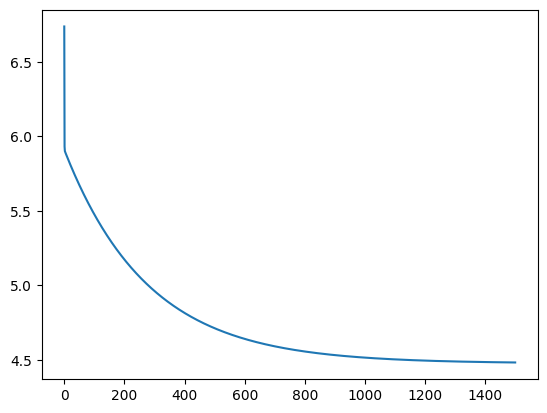

In [12]:
plt.plot(history)

可以看到最终确实收敛了。

接下来看看效果：

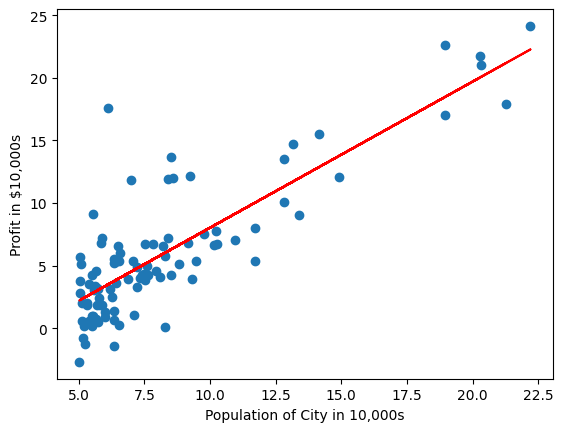

In [13]:
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], np.matmul(x, learned_params), color='red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

图像也与 PDF 里的一致。

## 使用解析求导法最优化线性回归的损失函数

由 $$\nabla_\theta J(\theta) = X^\mathrm{T}X\theta-X^\mathrm{T}y$$ 得所求 $$\theta = (X^\mathrm{T}X)^{-1}X^\mathrm{T}y$$

In [15]:
computed_theta = np.matmul(np.linalg.inv(np.matmul(x.T, x)), np.matmul(x.T, y))
print(computed_theta)
print(learned_params)

[[-3.89578088]
 [ 1.19303364]]
[[-3.63029144]
 [ 1.16636235]]


还是有点区别的，可以再训练几轮。

# 波特兰市房价预估

## 读数据


In [18]:
housing_price_df = pd.read_csv('ex1/ex1data2.txt', header=None)
housing_price_df.rename(columns={0: 'Size', 1: 'Number of bedrooms', 2:'Price'}, inplace=True)
housing_price_df.describe()

,Size,Number of bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


这次输入有二元。

Normalisation:

In [23]:
X = np.array(housing_price_df[['Size', 'Number of bedrooms']])
y = np.array(housing_price_df['Price'])

# Remember mean and std of each feature
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
y_mean = np.mean(y)
y_std = np.std(y)

# Normalise everything
X = (X - means) / stds
y = (y - y_mean) / y_std

## 损失函数

本质上与上面的一样，只不过这次 $X$ 是个矩阵，不是向量。

In [20]:
def compute_2d_cost(X, theta, y_true):
	return np.sum((np.matmul(X, theta) - y_true) ** 2) / 2 / len(X)

In [25]:
X = np.column_stack((np.ones(X.shape[0]), X))
theta = np.zeros((3, 1))
y = y.reshape((len(y), -1))

compute_2d_cost(X, theta, y)

0.5

## 梯度下降

之前用矩阵写的，现在简直不用变。

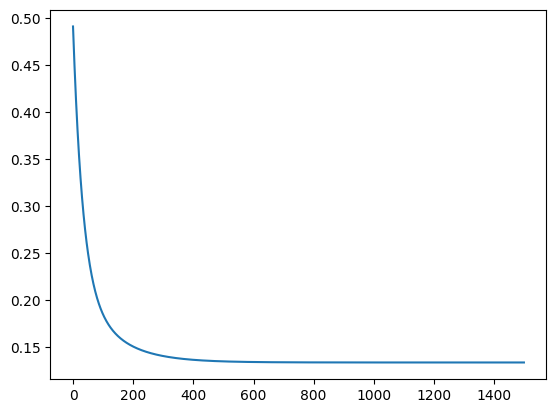

In [26]:
learned_params, history = gradient_descent(X, y, theta, learning_rate, num_iters)
plt.plot(history)

## 解析求导法

In [27]:
computed_theta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
print(computed_theta)
print(learned_params)

[[-7.32199462e-17]
 [ 8.84765988e-01]
 [-5.31788197e-02]]
[[-8.17017848e-17]
 [ 8.84137547e-01]
 [-5.25503786e-02]]


差别甚微。